# Intelligent Agents: Vacuum-cleaner World

Implement a simulator environment for a vacuum-cleaner world and a set of intelligent agents.

## PEAS description

__Performance Measure:__ Each action costs 1. The performance is measured as the sum of the cost to clean the whole environment.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size of the layout of the room (i.e., it knows n and where it starts).

__Actuators:__ The agent can `clean` the current square or move to an adjacent square by going `north`, `east`, `west`, or `south`.

__Sensors:__ Four bumper sensors, one for north`, `east`, `west`, and `south`; a dirt sensor reporting dirt in the current square.  

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop untill all squares are clean or a predefined number of steps have been reached.

## Define the agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictonary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`; not specified bumpers are assumed to be `False`. E.g., if the agent is on the north-west corner, `bumpers` gets `{"north" : True, "west" : True}` or if the agent is not close to a border then it gets `{}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [3]:
from numpy import random

actions = ["north", "east", "west", "south", "suck"]


def simple_randomized_agent(bumpers, dirty):
    return random.choice(actions)

In [19]:
simple_randomized_agent({"south" : True}, True)

'south'

## Simple environment example

The environment is infinite in size (bumpers are always `False`) and every square is dirty. We run the agent for 10 times steps.

In [3]:
for i in range(10):
    print(simple_randomized_agent({"north" : False, "south" : False, "west" : False, "east" : False}, True))

suck
south
west
suck
suck
south
north
north
south
west


# Tasks

_Submission Instructions:_ Use this notebook to prepare your submission. Complete this section with your code and results. You can use Markdown blocks for your description, comments in the code and use mathplotlib to produce charts. If you use external code files then you can include them with 

```
from notebook import psource
psource("your_file.py")
```

_Note:_ Try to keep the code simple! In this couse, we want to learn about the algorithms and we often do not need to use object-oriented design. 


## Task 1: Implement a simulation environment

Your environment simulator needs to create squares, make some dirty, and proivde the agent function with the sensor inputs. The environment needs to evaluate the performance measure. It needs to track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The simulation environment needs to work with the simple randomized agent program from above.

In [107]:
import numpy as np

# send bumper data to the vaccum
def getBumpter(n, pos):
    return {"north": pos[0] == 0,
            "south": pos[0] == n-1,
            "west":  pos[1] == 0,
            "east":  pos[1] == n-1}

def environment(agent, times = 10000, n=5, debug=False):
    room = [[np.random.choice([True, False], p = [0.2, 0.8]) for i in range(n)] for j in range(n)]
    dirtyNum = np.sum(room)
    if debug: print("Room Size", n*n)
    if debug: print("Dirty squares:", dirtyNum)
    if debug: print(np.matrix(room))
    
    pos = [0,0]
    count = 0
    state = []

    for i in range(times):
        count = count + 1
        if debug: print("Step ", count)
        bumpers = getBumpter(n,pos)
        if debug: print("Bumpers: ", bumpers)
            
        if (agent == model_based_reflex_agent): 
            action = agent(bumpers, room[pos[0]][pos[1]], pos.copy(), state)
        else: action = agent(bumpers, room[pos[0]][pos[1]])
        
        if debug:print("Action: ", action)
        
#       update the location of vaccum, if it hits the wall, it will stay there
        if action == "suck": room[pos[0]][pos[1]] = False
        if action == "north" and (pos[0] > 0): pos[0] = pos[0]-1
        if action == "south" and (pos[0] < n-1): pos[0] = pos[0]+1
        if action == "west" and (pos[1] > 0): pos[1] = pos[1]-1
        if action == "east" and (pos[1] < n-1): pos[1] = pos[1]+1
        if debug: print("Current Position: ", pos);
        
        dirtyNum = np.sum(room)
        if debug: print("Dirty squares: ", dirtyNum, "\n")
        if dirtyNum <= 0: break
        

    return count

        
environment(simple_randomized_agent,times = 5, n = 5,debug = True)

Room Size 25
Dirty squares: 4
[[False False False False False]
 [False False False False False]
 [ True False False  True False]
 [False  True False False False]
 [False False False False  True]]
Step  1
Bumpers:  {'north': True, 'south': False, 'west': True, 'east': False}
Action:  north
Current Position:  [0, 0]
Dirty squares:  4 

Step  2
Bumpers:  {'north': True, 'south': False, 'west': True, 'east': False}
Action:  suck
Current Position:  [0, 0]
Dirty squares:  4 

Step  3
Bumpers:  {'north': True, 'south': False, 'west': True, 'east': False}
Action:  west
Current Position:  [0, 0]
Dirty squares:  4 

Step  4
Bumpers:  {'north': True, 'south': False, 'west': True, 'east': False}
Action:  north
Current Position:  [0, 0]
Dirty squares:  4 

Step  5
Bumpers:  {'north': True, 'south': False, 'west': True, 'east': False}
Action:  south
Current Position:  [1, 0]
Dirty squares:  4 



5

## Task 2:  Implement a simple reflex agent

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking.

In [184]:
def simple_reflex_agent(bumpers, dirty):
    actions = ["north", "east", "west", "south"]
    if dirty: return "suck"
    
    # remove directions where bump sensors are triggered
    for i in bumpers:
        if bumpers[i]: actions.remove(i)
    
    #if the vaccum is around by obstacles, it will randomly act
    if len(actions) == 0:
        return random.choice(["north", "east", "west", "south"])
    else: return random.choice(actions)

environment(simple_reflex_agent, times = 10000, n = 20, debug=False)

3377

## Task 3: Implement a model-based reflex agent 

This agent keeps track of the location and remembers where it has cleaned. Assume the agent knows how many squares the room has and where it starts. It can now use more advanced navigation.

_Note on implementing the state:_ You can use a global variable. In Python, you have to use the keyword `global` in your function for this to work (see: https://www.programiz.com/python-programming/global-keyword). Alternatively, you can define a class for your agent with a member variable for the state and a function for the agent program (see: https://www.w3schools.com/python/python_classes.asp). 

Describe how your agent will perform 
* if it is put into a larger room, 
* if the room contains obstacles, or 
* if it starts in a random square.

Besides the data from bump sensors and dirt sensor, my model-based reflex agent stores the location which it has been. Each time it decides which direction to go, it will neglect then squares which it has been. If the vaccum has been to all the squares around it,it will choose a sqaure which is not wall randomly. 
* if it is put into a larger room, it works as expected as above.
* if the room contains obstacles, it works mostly as expected as above, but for some reasons, it may traps itself into obstacles.
* if it starts in a random square, it works as expected as above.

In [177]:
def model_based_reflex_agent(bumpers, dirty, pos, state):
    #add new pos to the state
    state.append(pos)
    
    actions = ["north", "east", "west", "south"]
    if dirty: return "suck"
    
    # remove the directions where bump sensors are triggered
    for i in bumpers:
        if bumpers[i]: actions.remove(i)
    
    actionList = actions.copy()
    
    #remove the squares where the robot has been 
    for a in actions:
        if a == "north" and ([pos[0]-1,pos[1]] in state): actionList.remove(a)
        if a == "south" and ([pos[0]+1,pos[1]] in state): actionList.remove(a)
        if a == "west" and ([pos[0],pos[1]-1] in state): actionList.remove(a)
        if a == "east" and ([pos[0],pos[1]+1] in state): actionList.remove(a)
    
    #if the vaccum has been to all the squares around it, choose a sqaure which is not wall randomly 
    if len(actionList)==0: 
        #if the vaccum is around by obstacles, it will randomly act
        if len(actions) == 0:
            return random.choice(["north", "east", "west", "south"])
        else: return random.choice(actions)
    else: return random.choice(actionList)

environment(model_based_reflex_agent, times = 10000, n = 20,debug= False)

2020

## Task 4: Simulation study

Compare the performance of the agents using different size environments. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use at least 100 random runs for each.

Agent: 
 ['simple_randomized', 'simple_reflex', 'model_based_reflex_agent']
Mean steps: 
 [422.62, 104.21, 34.0]
Standard Deviation: 
 [238.45501798033106, 64.48678856944265, 20.146960068456977]


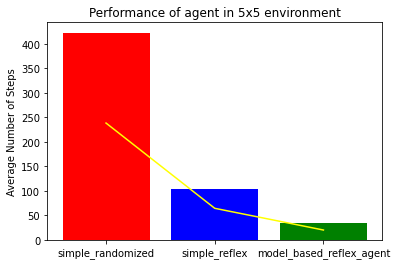

In [68]:
import matplotlib.pyplot as plt 
# In 5x5 environment
simpleNum = [0]*100
reflexNum =[0]*100
modelNum = [0]*100

for i in range(100):
    simpleNum[i] = environment(simple_randomized_agent, n = 5, debug = False)
    reflexNum[i] = environment(simple_reflex_agent, n = 5, debug = False)
    modelNum[i] = environment(model_based_reflex_agent, n= 5, debug = False)

x = [1,2,3]
y_mean = [np.mean(simpleNum),np.mean(reflexNum),np.mean(modelNum)]
y_std = [np.std(simpleNum),np.std(reflexNum),np.std(modelNum)]
x_label = ['simple_randomized','simple_reflex','model_based_reflex_agent']
plt.bar(x,y_mean,tick_label = x_label, width = 0.8, color = ['red','blue','green'])
plt.plot(x,y_std,color='yellow')
plt.ylabel('Average Number of Steps')
plt.title('Performance of agent in 5x5 environment')
print("Agent: \n", x_label)
print("Mean steps: \n", y_mean)
print("Standard Deviation: \n", y_std)

Agent: 
 ['simple_randomized', 'simple_reflex', 'model_based_reflex_agent']
Mean steps: 
 [3060.04, 804.97, 270.22]
Standard Deviation: 
 [982.5389653341998, 373.2542151135068, 114.3156664678993]


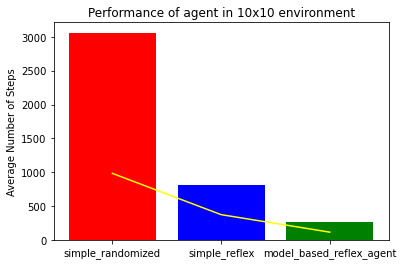

In [69]:
# In 10x10 environment
simpleNum = [0]*100
reflexNum =[0]*100
modelNum = [0]*100

for i in range(100):
    simpleNum[i] = environment(simple_randomized_agent, n = 10, debug = False)
    reflexNum[i] = environment(simple_reflex_agent, n = 10, debug = False)
    modelNum[i] = environment(model_based_reflex_agent, n= 10, debug = False)

x = [1,2,3]
y_mean = [np.mean(simpleNum),np.mean(reflexNum),np.mean(modelNum)]
y_std = [np.std(simpleNum),np.std(reflexNum),np.std(modelNum)]
x_label = ['simple_randomized','simple_reflex','model_based_reflex_agent']
plt.bar(x,y_mean,tick_label = x_label, width = 0.8, color = ['red','blue','green'])
plt.plot(x,y_std,color='yellow')
plt.ylabel('Average Number of Steps')
plt.title('Performance of agent in 10x10 environment')
print("Agent: \n", x_label)
print("Mean steps: \n", y_mean)
print("Standard Deviation: \n", y_std)

Agent: 
 ['simple_randomized', 'simple_reflex', 'model_based_reflex_agent']
Mean steps: 
 [7846.49, 2743.81, 943.75]
Standard Deviation: 
 [1726.2622077482897, 1089.9314904616713, 459.6080585672971]


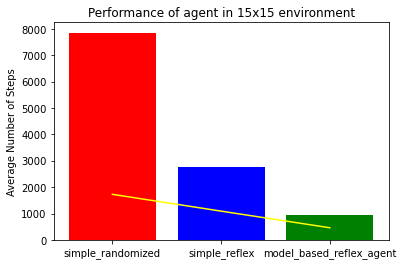

In [70]:
# In 15x15 environment
simpleNum = [0]*100
reflexNum =[0]*100
modelNum = [0]*100

for i in range(100):
    simpleNum[i] = environment(simple_randomized_agent, n = 15, debug = False)
    reflexNum[i] = environment(simple_reflex_agent, n = 15, debug = False)
    modelNum[i] = environment(model_based_reflex_agent, n= 15, debug = False)

x = [1,2,3]
y_mean = [np.mean(simpleNum),np.mean(reflexNum),np.mean(modelNum)]
y_std = [np.std(simpleNum),np.std(reflexNum),np.std(modelNum)]
x_label = ['simple_randomized','simple_reflex','model_based_reflex_agent']
plt.bar(x,y_mean,tick_label = x_label, width = 0.8, color = ['red','blue','green'])
plt.plot(x,y_std,color='yellow')
plt.ylabel('Average Number of Steps')
plt.title('Performance of agent in 15x15 environment')
print("Agent: \n", x_label)
print("Mean steps: \n", y_mean)
print("Standard Deviation: \n", y_std)

# Summary
model-based reflex agent takes significantly less steps than simple reflex agent with smaller deviation in three different size envrionment. Furthermore, simple reflex agent takes  takes significantly less steps than simple randomized agent with smaller deviation in three different size envrionment. Thus, we can conclude that the performance of model-based reflex agent > simple reflex agent >  simple randomized agent.

## Bonus tasks

* __Obstacles:__ Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.
* __Unknown environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square.
* __Utility-based agent:__ Change the environment, so each square has a fixed probability of getting dirty again. We assume the agent has learned this information over time. For the implementation, we give this information to the agent as a 2-dimensional array of probabilities  Cleaning one dirty square produces a utility of 1. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 10000 time steps. This is very tricky!

In [196]:
import numpy as np

# send bumper data to the vaccum
def getBumper(n, pos, blocks):
    bumper = {"north": pos[0] == 0,
            "south": pos[0] == n-1,
            "west":  pos[1] == 0,
            "east":  pos[1] == n-1}
    
    if include([pos[0]-1,pos[1]], blocks):
        bumper["north"] = True
    if include([pos[0]+1,pos[1]], blocks):
        bumper["south"] = True
    if include([pos[0],pos[1]-1], blocks):
        bumper["west"] = True
    if include([pos[0],pos[1]+1], blocks):
        bumper["east"] = True
    
    return bumper

#check if a square is obstacles
def include(square, blocks):
    for b in blocks:
        if b[0] == square[0] and b[1] == square[1]:
#             print(square, " is block")
            return True
    return False

def obstacle_environment(agent, times = 10000, n=5, debug=False):
    room = [[np.random.choice([True, False], p = [0.2, 0.8]) for i in range(n)] for j in range(n)]
          
#   generate n-1 obstacles
    blocks = [ np.random.choice(n,2) for i in range(n-1)]  
    # make sure the starting point is not trapped
    np.delete(blocks,[0,0])
    if include([0,1], blocks): np.delete(blocks, [1,0])
    if include([1,0], blocks): np.delete(blocks, [0,1])
    if debug:print("Obstacles: \n", blocks)

#   change obstacles to clean sqaures
    for b in blocks:
        room[b[0]][b[1]] = False
        
#   print out room info
    dirtyNum = np.sum(room)
    if debug: print("Room Size", n*n)
    if debug: print("Dirty squares:", dirtyNum)
    if debug: print(np.matrix(room))
        
    pos = [0,0]
    count = 0
    state = []

    for i in range(times):
        count = count + 1
        if debug: print("Step ", count)
        bumpers = getBumper(n,pos, blocks)
        if debug: print("Current Position: ", pos)
        if debug: print("Bumpers: ", bumpers)
            
        if (agent == model_based_reflex_agent): 
            action = agent(bumpers, room[pos[0]][pos[1]], pos.copy(), state)
        else: action = agent(bumpers, room[pos[0]][pos[1]])
        
        if debug:print("Action: ", action)
        
#       update the location of vaccum, if it hits the wall/obstacle, it will stay there
        if action == "suck": room[pos[0]][pos[1]] = False
        if action == "north" and (pos[0] > 0):
            if not include([pos[0]-1,pos[1]], blocks):
                pos[0] = pos[0]-1
        if action == "south" and (pos[0] < n-1): 
            if not include([pos[0]+1,pos[1]], blocks):
                pos[0] = pos[0]+1
        if action == "west" and (pos[1] > 0): 
            if not include([pos[0],pos[1]-1], blocks):
                pos[1] = pos[1]-1
        if action == "east" and (pos[1] < n-1): 
            if not include([pos[0],pos[1]+1], blocks):
                pos[1] = pos[1]+1
        if debug: print("Next Position: ", pos);
        
        dirtyNum = np.sum(room)
        if debug: print("Dirty squares: ", dirtyNum, "\n")
        if dirtyNum<= 0: break
        

    return count

        
obstacle_environment(simple_randomized_agent,times = 10, n = 5,debug = True)

Obstacles: 
 [array([3, 4]), array([3, 2]), array([1, 0]), array([1, 1])]
Room Size 25
Dirty squares: 2
[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [ True False  True False False]]
Step  1
Current Position:  [0, 0]
Bumpers:  {'north': True, 'south': True, 'west': True, 'east': False}
Action:  west
Next Position:  [0, 0]
Dirty squares:  2 

Step  2
Current Position:  [0, 0]
Bumpers:  {'north': True, 'south': True, 'west': True, 'east': False}
Action:  south
Next Position:  [0, 0]
Dirty squares:  2 

Step  3
Current Position:  [0, 0]
Bumpers:  {'north': True, 'south': True, 'west': True, 'east': False}
Action:  suck
Next Position:  [0, 0]
Dirty squares:  2 

Step  4
Current Position:  [0, 0]
Bumpers:  {'north': True, 'south': True, 'west': True, 'east': False}
Action:  south
Next Position:  [0, 0]
Dirty squares:  2 

Step  5
Current Position:  [0, 0]
Bumpers:  {'north': True, 'south': True, 'west': T

10

Agent: 
 ['simple_randomized', 'simple_reflex', 'model_based_reflex_agent']
Mean steps: 
 [920.72, 310.48, 238.55]
Standard Deviation: 
 [2098.3356789608283, 1387.985176289718, 1394.9853932927042]


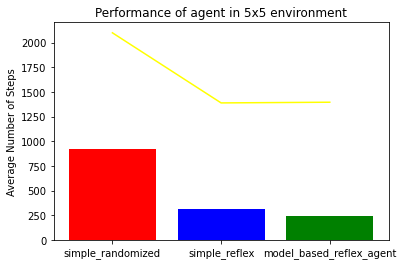

In [238]:
import matplotlib.pyplot as plt 
# In 5x5 environment
simpleNum = [0]*100
reflexNum =[0]*100
modelNum = [0]*100

for i in range(100):
    simpleNum[i] = obstacle_environment(simple_randomized_agent, n = 5, debug = False)
    reflexNum[i] = obstacle_environment(simple_reflex_agent, n = 5, debug = False)
    modelNum[i] = obstacle_environment(model_based_reflex_agent, n= 5, debug = False)

x = [1,2,3]
y_mean = [np.mean(simpleNum),np.mean(reflexNum),np.mean(modelNum)]
y_std = [np.std(simpleNum),np.std(reflexNum),np.std(modelNum)]
x_label = ['simple_randomized','simple_reflex','model_based_reflex_agent']
plt.bar(x,y_mean,tick_label = x_label, width = 0.8, color = ['red','blue','green'])
plt.plot(x,y_std,color='yellow')
plt.ylabel('Average Number of Steps')
plt.title('Performance of agent in 5x5 environment')
print("Agent: \n", x_label)
print("Mean steps: \n", y_mean)
print("Standard Deviation: \n", y_std)

### Bonus 1:
    We can see the peformance of all three agents drastically worsen. Most importantly, the Standard Deviation is   anormally high. I suspect that the three implementations of robot may trap the robot itself into wall and barrierrs . Thus, it may stop until it reaches the max times. 